<img src="imgs/dh_logo.png" align="right" width="50%">

# Sequential Ensembles: Boosting

<br>
<br>
<img src="sequential_boosting_init.png" align="center" width="50%">
<br>
<br>

#### Continuamos nossa discussão de técnicas de [`machine learning`](https://medium.com/greyatom/a-quick-guide-to-boosting-in-ml-acf7c1585cb5) para classificação. em nosso último encontro falamos sobre métodos de [Ensembles Paralelos](https://medium.com/analytics-vidhya/ensemble-learning-data-science-3b0a3832c479). Nesse encontro, vamos falar sobre métodos de [Ensembles sequenciais](https://www.analyticsvidhya.com/blog/2021/01/exploring-ensemble-learning-in-machine-learning-world/). Lembrando os tipos de Ensembles:


1. [`Parallel Ensemble Methods`](https://bdtechtalks.com/2020/11/12/what-is-ensemble-learning/): métodos de conjunto paralelo em que os `base learners` são gerados em paralelo (exemplos são os métodos de [`Bagging`, `Stacking`, `Voting`](https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de)). A motivação básica dos métodos paralelos é explorar a independência entre os `base learners`, pois o erro pode ser reduzido drasticamente pela média.


2. [`Sequential Ensemble Methods`](https://www.educba.com/bagging-and-boosting/): métodos de conjunto sequencial em que os `base learners` são gerados sequencialmente (exemplos é o método de [`Boosting`](https://towardsdatascience.com/what-is-boosting-in-machine-learning-2244aa196682)). A motivação básica dos métodos seqüenciais é explorar a dependência entre os `base learners`. O desempenho geral pode ser aprimorado pesando exemplos previamente rotulados incorretamente com maior peso.


#### Dentro desta classificação temos:


1. Parallel Ensemble Methods

    - [`Voting Ensemble`](https://stackabuse.com/ensemble-voting-classification-in-python-with-scikit-learn/);
    - [`Stacking Ensemble`](https://www.mariofilho.com/como-fazer-stacking-machine-learning/)
    - [`Bagging Ensemble`]()

2. Sequential Ensemble Methods

    - [`Boosting Ensemble`](https://towardsdatascience.com/boosting-algorithms-explained-d38f56ef3f30)

_________________

# Definição de Sequential Boosting Ensemble


#### O [`Boosting`](https://www.geeksforgeeks.org/boosting-in-machine-learning-boosting-and-adaboost/) é usado para converter [`weak learners`](https://medium.com/@toprak.mhmt/gradient-boosting-and-weak-learners-1f93726b6fbd#:~:text=The%20term%20Weak%20Learner%20refers,technically%2C%20any%20model%20will%20do.) em [`strong learners`](https://www.functionize.com/blog/boosting-ml-create-strong-learners/). 

- `Weak Learners`: Geralmente têm uma correlação muito fraca com os rótulos verdadeiros da classe;
- `Strong Learners`: Têm uma correlação muito alta entre o modelo e os verdadeiros rótulos da classe.

#### [`Boosting`](https://www.youtube.com/watch?v=9IyJ4HvubGo&ab_channel=SASSoftware) envolve treinar iterativamente os `weak learners`, cada um tentando corrigir o erro cometido pelo modelo anterior. Isso é obtido treinando um modelo fraco em todos os dados de treinamento e construindo um segundo modelo que visa corrigir os erros cometidos pelo primeiro modelo. Em seguida, construímos um terceiro modelo que tenta corrigir os erros cometidos pelo segundo modelo e assim por diante. Os modelos são adicionados iterativamente até o modelo final corrigir todos os erros cometidos por todos os modelos anteriores.

#### Quando os modelos são adicionados em cada estágio, alguns pesos são atribuídos ao modelo, o que está relacionado à precisão do modelo anterior. Após a adição de um classificador fraco, os pesos são reajustados. Os pontos classificados incorretamente recebem pesos mais altos e os pontos classificados corretamente recebem pesos menores. Essa abordagem fará com que o próximo classificador se concentre nos erros cometidos pelo modelo anterior.

#### O aumento reduz o erro de generalização, adotando um modelo de alta e baixa variância e reduzindo a tendência em um nível significativo. Lembre-se, [`Bagging`](https://towardsdatascience.com/bagging-on-low-variance-models-38d3c70259db#:~:text=This%20technique%20is%20effective%20on,intuition%20behind%20it%20is%20crucial.) reduz a variação. Semelhante ao *Bagging*, o reforço também permite trabalhar com os modelos de classificação e regressão. Dê uma olhada nos diagramas abaixo para entender intuitivamente como o aumento funciona em cada um dos estágios. O diagrama abaixo mostra os diferentes estágios de um algoritmo de aumento.

<img src="boosting_process.png" align="center" width="60%">

#### Vamos entender o diagrama acima. Temos um conjunto de dados `D` e a primeira coisa que faremos no estágio $0$ é treinar um modelo em todo o conjunto de dados. O modelo pode ser uma classificação ou um modelo de regressão. Vamos nomear esse modelo como $M_{0}$ e assumir que este modelo está tentando ajustar uma função $h_{0}(x)$. Então, a função de previsão para este modelo é dada por $y_{pred} = h_{0}(x)$. 

#### O modelo $0$ foi projetado para ter um alto viés. Geralmente, o reforço é aplicado para um modelo de alto viés e baixa variação. $O$ alto viés em um modelo refere-se basicamente a um alto erro de treinamento. O alto viés surge principalmente devido a algumas suposições incorretas feitas na fase de treinamento.

#### Agora, após a construção do primeiro modelo, obteremos, no estágio $0$, o erro de previsão para cada ponto de dados criado pelo modelo $M_{0}$. Portanto, o erro na previsão para qualquer rótulo de classe é dado por $y - y_{pred}$. Lembre-se, existem muitas funções de erro por aí - por exemplo, o erro quadrático, o [`hinge loss error`](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23), o erro de perda logística etc. Mas, por simplicidade, vamos nos concentrar no erro de diferença simples para este exemplo.

### No estágio $1$ tentaremos ajustar um modelo $M_{1}$ aos erros produzidos pelo modelo no estágio $0$. Lembre-se, $M_{1}$ não está treinando nos rótulos de classe reais. $M_{1}$ está treinando nos erros que obtivemos no final do estágio $0$. Digamos que obtemos uma função $h_{1}(x)$, que treinou os erros gerados pelo modelo $M_{0}$. Assim, no final do estágio $1$, o modelo final será realmente a soma ponderada das duas funções de previsão anteriores (como mostrado no diagrama). Atribuiremos os pesos $a_{0}$ e $a_{1}$ a $h_{0}(x)$ e $h_{1}(x)$ respectivamente. Portanto, no final do estágio $1$, o modelo se parece com: 


<center> $$ F_{1}(x) = a_{0} * h_{0}(x) + a_{1} * h_{1}(x); $$ </center>

#### em que $a_{0}$ e $a_{1}$ são pesos atribuídos às funções de previsão. Lembre-se de que os pesos sempre serão maiores para funções com alto erro de classificação incorreta. Dessa forma, podemos criar o próximo modelo na sequência para focar mais nos erros cometidos pelo modelo anterior.

#### Da mesma forma, o modelo no final do estágio $2$ terá a função: 


<center> $$ F_{2}(x) = a_{0} * h_{0}(x) + a_{1} * h_{1}(x) + a_{2} * h_{2}(x). $$ </center>

#### Assim, no final de todas as etapas, o modelo final que temos é dado pela soma de $a_{i} * h_{x}(i)$, onde o valor de $i$ varia de $1$ a $N$. Assim, intuitivamente, estamos na verdade reduzindo o erro de treinamento, o que significa em outras palavras, na verdade estamos reduzindo o viés de um modelo.

## Entrando no modelo matemático

#### Existem muitas publicações sobre o conceito de [`Boosting`](https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/). Em 1988, Michael Kearns publicou o [Thoughts on Hypothesis Boosting](https://www.cis.upenn.edu/~mkearns/papers/boostnote.pdf), que provavelmente é o mais antigo da literatura. Sobre os algoritmos, é possível encontrar algumas referências. Considere, por exemplo, [Improving Regressors using Boosting Techniques](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.31.314&rep=rep1&type=pdf), de Harris Drucker. Ou a abordagem de [The Boosting Approach to Machine Learning An Overview](https://www.cs.princeton.edu/courses/archive/spr08/cos424/readings/Schapire2003.pdf) de Robert Schapire, entre muitos outros. Para ilustrar o uso de reforço no contexto de regressão, considere a seção em [ The boosting: A new idea of building models.](https://sci-hub.se/10.1016/j.chemolab.2009.09.002), de Dong-Sheng Cao.

<br>
<img src="boosting-algo-7.gif" align="center" width="40%">
<br>

#### Dado os dados com os `samples` $(x_{1}, y_1)$, em que $y_{i} = 0,1$ para `samples` positivos e `samples` negativos respectivamente. Inicialização nossos pesos: 


$$ 
w_{1,i} = \frac{1}{2m}, \frac{1}{2l}, 
$$ 

#### para  $ y_{i} = 0,1$ respectivamente. Onde $m$ é o número de `samples` positivos e $l$ é o número de `samples` negativos.


#### Para cada $t = 1, 2,...,T$ são executados os passos seguintes:

**1. Normalização dos pesos**


$$ 
w_{t,i} = \frac{ w_{t,i} }{ \sum_{j=1}^{n} w_{t,j} } 
$$


**2. Seleção dos melhores classificadores em relação ao erro ponderado**


$$ 
\varepsilon_{t} = min_{f, p, \theta} \sum_{i} w_{i} | h(x_{i}, f, p, \theta) - y_{i} |, 
$$

#### que define $h_{i}(x) = h(x, f_{t}, p_{t}, \theta_{t})$ onde $f_{t}, p_{t}, y, \theta_{t} $ são minimizadores de $\varepsilon_{t}$


**3. Atualização dos pesos**


$$ 
w_{t+1, i} = w_{t, i} \beta_t^{1-e_{i}}, 
$$


em que  $e_{i} = 0$ se o `sample` é classificado corretamente, $e_{i} = 1$ se o `sample` é classificado erroneamente, e


$$
\beta_{t} = \frac{\varepsilon_{t}}{1 - \varepsilon_{t}} 
$$

**4. O classificador final será:**


$$ 
C(x) = 1, 
$$

#### se $ \sum_{t = 1}^{T} \alpha_{t}h_{t}(x) \geq \frac{1}{2} \sum_{t = 1}^{T} \alpha_{t}$. Do contrário:

$$ 
C(x) = 0, 
$$

#### em que $\alpha_{t} = log\bigg(\frac{1}{\beta_{t}}\bigg)$.

## Demonstração de Boosting para Classificadores

<img src="boosting_0.png" align="left" width="20%">

#### 1) Primeiramente, criamos um classificador base. Ele vai conter erros, e precisamos corrigí-los

<img src="boosting_1.png" align="left" width="20%">

#### 2) Criamos um segundo classificador, mas que opera em cima dos erros do primeiro (wrong predictions).

<img src="boosting_2.jpeg" align="left" width="20%">

#### 3) Continuamos esse loop até chegar na performance desejada. O output final é dado pela Weighted Average dos sub-modelos

<img src="boosting_3.png" align="left" width="20%">

#### 4) Nosso modelo final é uma combinação de todos os outros

Algoritmos baseados em boosting:
 - [`Adaboost`]()
 - [`GBM (Gradient Boosting Machine)`]()
 - [`XGBoost (Extreme Gradient Boost)`]()
 - [`LightGBM`]()
 - [`CatBoost`]()

_______________

# Algoritmos de Boosting

## AdaBoost

#### O reforço adaptativo ou [`AdaBoost`](https://www.mygreatlearning.com/blog/adaboost-algorithm/) é um dos algoritmos de reforço mais simples. Geralmente, as árvores de decisão são usadas para modelagem, vários modelos seqüenciais são criados, cada um corrigindo os erros do último modelo. O [`AdaBoost`](https://www.datacamp.com/community/tutorials/adaboost-classifier-python) atribui pesos às observações preditas incorretamente e o modelo subseqüente trabalha para prever esses valores corretamente.


    1 - Árvore de tocos (`weak learners`);
    2 - As decisões são ponderadas entre os tocos;
    
$$
\text{Contribuição} = \frac{1}{2}\bigg(\frac{1 - \text{Erro Total}}{\text{Erro Total}}\bigg),
$$

    em que o Erro Total é a soma dos pesos das amostras classificadas incorretamente.


<img src="AdaBoost.png" align="center" width="20%">

    3 - Cada novo toco é criado a partir dos erros de classificação do toco anterior.

$$
\text{Peso} = \text{Peso} \times \exp^{\text{Contribuição}},
$$    


#### Abaixo estão as etapas para executar o algoritmo `AdaBoost`:


1. Inicialmente, todas as observações no conjunto de dados recebem pesos iguais. O valor dos pesos será portanto igual a um dividido pelo número de observações do `DataSet`.

2. Um modelo é construído em um subconjunto de dados. Pegando como exemplo as `Decision Trees`, será calculado qual o atributo que melhor separa os dados segundo um critério adotado. Um dos critérios adotados para este cálculo é o Indice [`Gini`](https://towardsdatascience.com/a-mathematical-explanation-of-adaboost-4b0c20ce4382), outro é a [entropia](https://towardsdatascience.com/adaboost-for-dummies-breaking-down-the-math-and-its-equations-into-simple-terms-87f439757dcf).

3. Usando esse modelo, são feitas previsões em todo o conjunto de dados.

4. Os erros são calculados comparando as previsões e os valores reais.

5. Ao criar o próximo modelo, pesos mais altos são dados aos pontos de dados que foram previstos incorretamente.

6. Os pesos podem ser determinados usando o valor do erro. Por exemplo, quanto maior o erro, maior é o peso atribuído à observação.

7. Esse processo é repetido até que a função de erro não seja alterada ou que o limite máximo do número de estimadores seja atingido.


#### Hiper-Parâmetros:

#### A biblioteca de métodos de ensemble [sklearn.ensemble.AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) apresenta os seguintes hiperparâmetros.

- `base_estimators` (estimador base)
    - Ajuda a especificar o tipo de estimador de base, ou seja, o algoritmo de aprendizado de máquina a ser usado como aluno de base.


- `n_estimators` (n estimadores)
    - Ele define o número de estimadores de base. 
    - O valor padrão é $10$, mas você deve manter um valor mais alto para obter melhor desempenho.


- `learning_ratefloat` (taxa de Aprendizagem)
    - Este parâmetro controla a contribuição dos estimadores na combinação final.
    - Há uma troca entre `learning_rate` e `n_estimators`.
    
    
- `max_depth`(profundidade máxima)
    - Define a profundidade máxima do estimador individual.
    - Ajuste esse parâmetro para obter o melhor desempenho.


- `n_jobs` (n tarefas)
    - Especifica o número de processadores que está autorizado a usar.
    - Defina o valor como $-1$ para o número máximo de processadores permitido.
    
    
- `random_state` (estado aleatório)
    - Um valor inteiro para especificar a divisão de dados aleatórios.
    - Um valor definido de random_state sempre produzirá os mesmos resultados se fornecido com os mesmos parâmetros e dados de treinamento.

## Gradient Boosting (GBM)


#### O [`Gradient Boosting`](https://machinelearningmastery.com/gradient-boosting-machine-ensemble-in-python/) ou GBM é outro algoritmo de aprendizado de máquina de conjunto que funciona para problemas de [regressão](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) e [classificação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). O GBM usa a técnica de reforço, combinando vários `weak learnenrs` para formar um `strong learner`. Árvores de regressão são usadas como `base learner`, cada árvore subsequente em série é construída com base nos erros calculados pela árvore anterior.

#### Usaremos um exemplo simples para entender o algoritmo GBM. Temos que prever a idade de um grupo de pessoas usando os dados abaixo:


<img src="gbm1.png" align="left" width="40%">

<br>
<br>
<br>

    1. Um valor médio é assumido como o valor previsto para todas as observações no conjunto de dados.

    2. Os erros são calculados usando esta previsão média e os valores reais.

<br>
<br>
<br>

<img src="gbm2.png" align="right" width="40%">

<br>
<br>
<br>

    3. Um modelo de árvore é criado usando os erros calculados acima como variável de destino. Nosso objetivo é encontrar a melhor divisão para minimizar o erro.

$$
\text{Residual} = \text{Observed} - \text{Predicted}  
$$

    4. As previsões desse modelo são combinadas com as previsões 1.
    
$$
\text{Prediction} = \text{Initial Guess} + \text{Learning rate} \sum_{i = 1}^{\text{Total Árvores}} \text{Prediction}_{i}  
$$    

<br>
<br>
<br>

<img src="gbm3.png" align="left" width="40%">

<br>
<br>
<br>

    5. Este valor calculado acima é a nova previsão.

    6. Novos erros são calculados usando esse valor previsto e o valor real.

<br>
<br>
<br>

<img src="gbm4.png" align="right" width="40%">

<br>
<br>
<br>

    7. As etapas 2 a 6 são repetidas até que o número máximo de iterações seja atingido (ou a função de erro não seja alterada).


## XGBoost

#### O [`XGBoost`](https://xgboost.readthedocs.io/en/latest/tutorials/model.html) (Extreme Gradient Boosting) é uma implementação avançada do algoritmo de aumento de gradiente. O [`XGBoost`](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/) provou ser um algoritmo ML altamente eficaz, amplamente utilizado em competições de aprendizado de máquina e hackathons. O XGBoost possui alto poder preditivo e é quase 10 vezes mais rápido que as outras técnicas de aumento de gradiente. Ele também inclui uma variedade de regularização que reduz o excesso de ajuste e melhora o desempenho geral. Por isso, também é conhecida como técnica de "reforço regularizado".

#### Vamos ver como o [`XGBoost`](https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer) é comparativamente melhor do que outras técnicas:

1. Regularização:
    - A implementação padrão do GBM não tem regularização como o XGBoost.
    - Assim, o XGBoost também ajuda a reduzir o excesso de ajustes.

2. Processamento paralelo:
    - O XGBoost implementa o processamento paralelo e é mais rápido que o GBM.
    - O XGBoost também suporta a implementação no Hadoop.

3. Alta flexibilidade:
    - O XGBoost permite que os usuários definam objetivos de otimização personalizados e critérios de avaliação, adicionando uma nova dimensão ao modelo.
    - Tratamento de valores ausentes:
    - O XGBoost possui uma rotina integrada para lidar com os valores ausentes.

4. Poda de árvores:
    - O XGBoost faz divisões até o max_depth especificado e, em seguida, começa a podar a árvore para trás e remove as divisões além das quais não há ganho positivo.

5. Validação cruzada incorporada:
    - O XGBoost permite que o usuário execute uma validação cruzada a cada iteração do processo de otimização e, portanto, é fácil obter o número ideal exato de iterações de otimização em uma única execução.

Hiper-Parâmetros:

#### A biblioteca de métodos de ensemble [XGBoost](https://xgboost.readthedocs.io/en/latest/tutorials/model.html) apresenta os seguintes hiperparâmetros.


- `nthread`
    - Isso é usado para processamento paralelo e o número de núcleos no sistema deve ser inserido.
    - Se você deseja executar em todos os núcleos, não insira esse valor. O algoritmo irá detectá-lo automaticamente.

- `eta`
    - Análogo à taxa de aprendizado em GBM.
    - Torna o modelo mais robusto diminuindo os pesos em cada etapa.


- `min_child_weight`
    - Define a soma mínima de pesos de todas as observações necessárias em uma nó children.
    - Usado para controlar o excesso de ajuste. Valores mais altos impedem um modelo de aprender relações que podem ser altamente específicas para a amostra específica selecionada para uma árvore.


- `max_depth`
    - É usado para definir a profundidade máxima.
    - Uma profundidade maior permitirá que o modelo aprenda relações muito específicas para uma amostra específica.
    
    
- `max_leaf_nodes`
     - O número máximo de nós terminais ou folhas em uma árvore.
     - Pode ser definido no lugar de max_depth. Como as árvores binárias são criadas, uma profundidade de 'n' produziria no máximo 2 ^ n folhas.
     - Se isso estiver definido, o GBM ignorará max_depth.
     
     
- `gama`
    - Um nó é dividido apenas quando a divisão resultante fornece uma redução positiva na função de perda. Gamma especifica a redução de perda mínima necessária para fazer uma divisão.
    - Torna o algoritmo conservador. Os valores podem variar dependendo da função de perda e devem ser ajustados.
    
    
- `subsample`
    - O mesmo que a subamostra de GBM. Indica a fração de observações a serem amostradas aleatoriamente para cada árvore.
    - Valores mais baixos tornam o algoritmo mais conservador e evitam o ajuste excessivo, mas valores muito pequenos podem levar a um ajuste insuficiente.


- `colsample_bytree`
    - É semelhante ao max_features no GBM.
    - Indica a fração de colunas a serem amostradas aleatoriamente para cada árvore.
 


## LGBM - Light GBM

#### Antes de discutir como o [`Light GBM`](https://machinelearningmastery.com/light-gradient-boosted-machine-lightgbm-ensemble/) funciona, primeiro vamos entender porque precisamos desse algoritmo quando temos tantos outros, como os que vimos acima. O [`Light GBM`](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/) supera todos os outros algoritmos quando o conjunto de dados é extremamente grande. Comparado aos outros algoritmos, o [`Light GBM`](https://www.kaggle.com/amar09/fare-prediction-stacked-ensemble-xgboost-lgbm) leva menos tempo para executar em um enorme conjunto de dados.

#### O [`Light GBM`](https://towardsdatascience.com/a-quick-guide-to-lightgbm-library-ef5385db8d10#:~:text=LightGBM(LGBM)%20is%20an%20open,with%20incredible%20speed%20and%20accuracy.) é uma estrutura de aumento de gradiente que usa algoritmos baseados em árvore e segue a abordagem em folha, enquanto outros algoritmos trabalham em um padrão de abordagem em nível. As imagens abaixo ajudarão você a entender a diferença de uma maneira melhor.

<img src="lgbm.png" align="center" width="50%">

#### O crescimento em folha pode causar excesso de ajuste em conjuntos de dados menores, mas isso pode ser evitado usando o parâmetro `max_depth` para aprender.

Hiper-Parâmetros:

#### A biblioteca de métodos de ensemble [LGBM](https://lightgbm.readthedocs.io/en/latest/) apresenta os seguintes hiperparâmetros.

- `num_iterations`
    - Ele define o número de iterações de reforço a serem executadas.

- `num_leaves`
    - Este parâmetro é usado para definir o número de folhas a serem formadas em uma árvore.
    - No caso do Light GBM, como a divisão ocorre em folhas em vez de em profundidade, num_leaves deve ser menor que 2 ^ (max_depth), caso contrário, pode levar ao sobreajuste.

- `min_data_in_leaf`
    - Um valor muito pequeno pode causar super ajuste.
    - É também um dos parâmetros mais importantes para lidar com o super ajuste.

- `max_depth`
    - Ele especifica a profundidade ou o nível máximo até o qual uma árvore pode crescer.
    - Um valor muito alto para esse parâmetro pode causar super ajuste.
        
- `bagging_fraction`
    - É usado para especificar a fração de dados a ser usada para cada iteração.
    - Este parâmetro é geralmente usado para acelerar o treinamento.

- `max_bin`
    - Define o número máximo de posições em que os valores dos recursos serão agrupados.
    - Um valor menor de max_bin pode economizar muito tempo, pois agrupa os valores dos recursos em compartimentos discretos, o que é computacionalmente barato.

## CatBoost


#### O tratamento de variáveis categóricas é um processo tedioso, especialmente quando você tem um grande número dessas variáveis. Quando suas variáveis categóricas têm muitos rótulos, ou seja, são altamente cardinais, a execução de uma codificação `one-hot-encoding` exponencialmente aumenta a dimensionalidade e torna-se realmente difícil trabalhar com o conjunto de dados.


#### O [`CatBoost`](https://catboost.ai/) pode lidar automaticamente com variáveis categóricas e não requer amplo pré-processamento de dados, como outros algoritmos de aprendizado de máquina.


Hiper-Parâmetros

#### A biblioteca de métodos de ensemble [CatBoost](https://catboost.ai/docs) apresenta os seguintes hiperparâmetros.



- `loss_function`
    - Define a métrica a ser usada para o treinamento.

- `iterations`
    - O número máximo de árvores que podem ser construídas.
    - O número final de árvores pode ser menor ou igual a esse número
        
- `learning_rate`
    - Define a taxa de aprendizado.
    - Usado para reduzir a etapa do gradiente.

- `border_count`
    - Especifica o número de divisões para recursos numéricos.
    - É semelhante ao parâmetro max_bin.
        
- `depth`
    - Define a profundidade das árvores.


- `random_seed`
    - Este parâmetro é semelhante ao parâmetro 'random_state' que vimos anteriormente.
    - É um valor inteiro para definir a semente aleatória para treinamento.
 

#### Os `Ensembles` podem aumentar exponencialmente o desempenho do seu modelo e às vezes pode ser o fator decisivo entre o primeiro e o segundo lugar! Abordamos várias técnicas de *Ensembles* e vimos como essas técnicas são aplicadas em algoritmos de aprendizado de máquina. 

------------

# Hyperparametrization

#### O ajuste é técnica que funciona bem para modelos mais simples, como regressão linear, árvores de decisão, etc. Eles têm apenas alguns hiperparâmetros - `learning_rate`, `no_of_iterations`, `alpha, lambda` - e é fácil saber o que eles significam.

#### Mas os GBMs são um mundo diferente:

    - Eles têm um grande número de hiperparâmetros.

    - Ao contrário da Floresta Aleatória, suas configurações padrão geralmente não são as ideais para o seu problema.


#### Portanto, se você deseja usar os GBMs para modelar seus dados, é necessário obter um [entendimento](https://towardsdatascience.com/understanding-gradient-boosting-machines-using-xgboost-and-lightgbm-parameters-3af1f9db9700) de alto nível do que acontece internamente. 

<br>
<br>
<img src="boosting_hyperparameters.png" align="center" width="60%">
<br>
<br>

----------

# Comparando BoostingClassifiers - Caso Prático (Diabetes)

#### Vamos comparar o uso de técnicas de [`Gradient Boosting`](https://towardsdatascience.com/predicting-carcinogens-with-logistic-regression-knn-gradient-boosting-and-molecular-e7952294a08c) e com o da regressão logística, tentando classificar o [diabetes](https://www.kaggle.com/saurabh00007/diabetescsv/download) com base no resultado.

#### Essencialmente, o conjunto de dados fornece vários recursos usados para prever a variável de resultado (com diabetes = $1$, sem diabetes = $0$). Primeiramente, foi realizada a extração de características com [`extra-trees`](https://www.statworx.com/at/blog/how-to-speed-up-gradient-boosting-by-a-factor-of-two/) para identificar as características mais importantes na previsão da variável de resultado.

#### Em seguida, os seguintes modelos foram executados:

    - Regressão logística;
    - Classificador de aumento de gradiente;
    - Classificador LightGBM;
    - Classificador XGBoost;
    - Classificador AdaBoost;
    - Extração de recursos.
    
#### A extração de recursos está sendo usada para determinar os recursos mais importantes que influenciam a variável de resultado, ou seja, quais recursos têm a correlação mais forte com a incidência de diabetes.

In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv("diabetes.csv", 
                 delimiter = ','
                )

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Acplicamos o método [`sklearn.ensemble.ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html), que implementa um metaestimador que ajusta um número de árvores de decisão aleatórias (também conhecidas como árvores extras) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o sobreajuste de controle.

In [5]:
y = df.Outcome
x = df.drop(['Outcome'], 
            axis = 1
           )
x.shape, y.shape

((768, 8), (768,))

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators = 10)
model.fit(x, y)

ExtraTreesClassifier(n_estimators=10)

In [7]:
print(model.feature_importances_)

[0.09935715 0.22089765 0.1032092  0.0870611  0.07872936 0.13797582
 0.12176146 0.15100826]


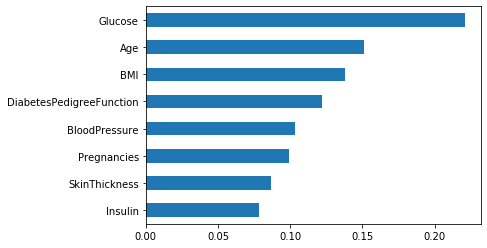

In [9]:
(pd.Series(model.feature_importances_, 
           index = x.columns
          ).nlargest(9).sort_values().plot.barh());

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Na extração do recurso, os atributos $1$ (Glucose), $7$ (Age), $5$ (BMI), $6$ (DiabetesPedigreeFunction), $2$ BloodPressure e $0$ (Pregnacies) apresentaram as pontuações mais altas em termos de importância do recurso, e esses serão incluídos nos modelos para prever a variável de resultado.

In [12]:
x0 = x.iloc[:, 0]
x1 = x.iloc[:, 1]
x2 = x.iloc[:, 2]
x5 = x.iloc[:, 5]
x6 = x.iloc[:, 6]
x7 = x.iloc[:, 7]

xnew = np.column_stack((x0, x1, x2, x5, x6, x7))
xnew
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(xnew, 
                                             y, 
                                             random_state = 0
                                            )

#### Portanto, essas variáveis foram definidas como `xnew` em uma pilha de colunas `numpy` e os dados foram particionados em dados de treinamento e validação com `train_test_split`.

## LogisticRegression Vs. BoostingClassifiers

#### Depois de selecionar os recursos relevantes e particionar os dados, uma regressão logística pode ser executada em conjunto com vários classificadores de impulso.

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(x_train, y_train)
print(logreg)
print('+++++++')

# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 0).fit(x_train, y_train)
print(gbrt)
print('+++++++')

#  LightGBM Classifier
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(learning_rate = 0.001, 
                               num_leaves = 65, 
                               n_estimators = 100
                              ).fit(x_train, y_train)                       
print(lgb_model)
print('+++++++') 

# XGBoost
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate = 0.001, 
                              max_depth = 1, 
                              n_estimators = 100, 
                              use_label_encoder = False
                             ).fit(x_train, y_train)
print(xgb_model)
print('+++++++')

# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), 
                             n_estimators = 100, 
                             algorithm = "SAMME.R", 
                             learning_rate = 0.001
                            ).fit(x_train, y_train)
print(ada_clf)
print('+++++++')

print('*****************ClassifiersDone*****************')

LogisticRegression()
+++++++
GradientBoostingClassifier(random_state=0)
+++++++
LGBMClassifier(learning_rate=0.001, num_leaves=65)
+++++++
[14:34:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              val

#### Como pode ser observado, o número de `n_estimators` foi definido como $100$ enquanto a taxa de aprendizado foi definida como $0.001$. Muitas são as configurações e [técnicas do impulso de gradiente](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/), mas, neste caso, a taxa de aprendizado (ou parâmetro de encolhimento) é definida abaixo de $0.1$ para um melhor erro de generalização, enquanto o número de `n_estimators` (ou número de árvores) é definido como $100$.

#### A seguir calculamos as pontuações de conjunto de treinamento e validação. 

In [22]:
models = ['Logistic', 
          'GradientBoost', 
          'LightGBM', 
          'XGBoost', 
          'AdaBoost'
         ]

Trainning_Accuracy = [logreg.score(x_train, y_train), 
                      gbrt.score(x_train, y_train), 
                      lgb_model.score(x_train, y_train), 
                      xgb_model.score(x_train, y_train), 
                      ada_clf.score(x_train, y_train)
                     ]
Validation_Accuracy = [logreg.score(x_val, y_val), 
                       gbrt.score(x_val, y_val), 
                       lgb_model.score(x_val, y_val), 
                       xgb_model.score(x_val, y_val), 
                       ada_clf.score(x_val, y_val)
                      ]
pd.DataFrame(list(zip(Trainning_Accuracy, 
                      Validation_Accuracy
                     )
                 ),
             columns = ['Trainning_Accuracy', 'Validation_Accuracy'], 
             index = models 
            )

,Trainning_Accuracy,Validation_Accuracy
Logistic,0.762153,0.796875
GradientBoost,0.911458,0.817708
LightGBM,0.642361,0.677083
XGBoost,0.748264,0.750000
AdaBoost,0.748264,0.750000


#### Observando os resultados acima, duas coisas são evidentes:

    1. Somente o `GradientBoostingClassifier` gera uma precisão de validação superior à regressão logística - todos os outros modelos de impulso mostram uma precisão de validação um pouco menor.

    2. Além disso, a precisão da regressão logística no conjunto de treinamento é um pouco menor que a do conjunto de validação, o que implica que o excesso de ajuste é um problema menor na regressão logística do que nos modelos de impulso de gradiente.

## Conclusão

#### Os modelos de reforço tornaram-se um tipo de "caixa preta" e são cada vez mais invocados para maior precisão. No entanto, esses modelos não fornecem necessariamente a melhor precisão em todos os casos, como vimos aqui e a questão do [`Overfitting`](https://towardsdatascience.com/machine-learning-part-18-boosting-algorithms-gradient-boosting-in-python-ef5ae6965be4) também deve ser considerada.

#### Observou-se para o `GradientBoost` que a precisão do treinamento foi significativamente maior que a precisão da validação e isso indica `Overfit`.

#### O `Boosting` funciona com a premissa de combinar vários modelos fracos (por exemplo, muitas árvores de decisão) para aumentar a precisão - daí o motivo pelo qual esses modelos são frequentemente chamados de modelos de conjunto. Embora o `Boosting` possa ser vantajoso, dependendo dos dados com os quais estamos trabalhando, eles apresentam um risco de excesso de ajuste e, por padrão, não devem ser invocados sem considerar os dados em questão e se outros modelos podem ser mais adequados.